In [1]:
import pmtoolkit
import numpy as np
import matplotlib.pyplot as plt

print(pmtoolkit.list_wf_labels())

['THC_0104-master/R01', 'THC_0104-master/R02', 'THC_0036-master-R03/R03', 'BAM_0001-master/R01', 'BAM_0001-master/R02', 'BAM_0001-master/R04', 'BAM_0001-master/R03', 'BAM_0070-master-R01/R01', 'BAM_0007-master/R01', 'BAM_0007-master/R02', 'BAM_0058-master-R02/R02', 'BAM_0037-master-R04/R04']


In [2]:
this_waveform = pmtoolkit.NRWaveform("BAM_0037-master-R04/R04")
# there is an optional argument 'loudness' that allows you to scale the waveform amplitude if you wish to do so

opening /Users/fipanther/Documents/Work/waveforms/CoRE_waveforms/BAM_0037-master-R04/R04/data.h5...


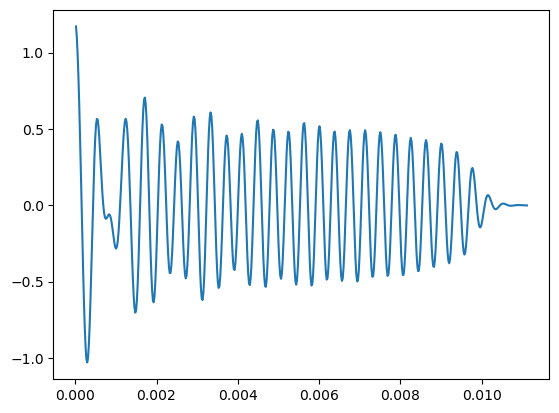

In [3]:
plt.figure()
plt.plot(this_waveform.tnew, this_waveform.hrenew)

In [4]:
duration = 1000/(8192 * 2)

sampling_frequency = 8192 * 2

t = np.arange(0,duration,1/sampling_frequency)

In [5]:
# we can interpolate the waveform and shift it to a new start time t_0:
wave = this_waveform.interpolate_wf_to_new_tarray(t, 0.01)

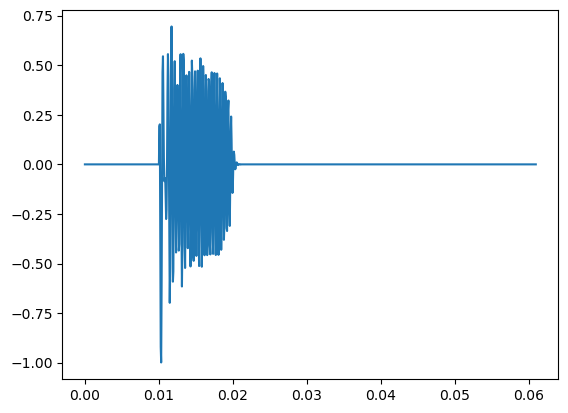

In [6]:
plt.figure()
plt.plot(t, wave['plus'])

In [7]:
# would you prefer some sort of damped sinusoid? You're welcome
damped_sin = pmtoolkit.damped_sinusoid_td(sampling_frequency, duration, weight = 1,
                                                                amplitude = -21, #log_10
                                                                damping_time = 30, # in ms
                                                                frequency = 1500,
                                                                phase = np.pi, 
                                                                 drift = 5)

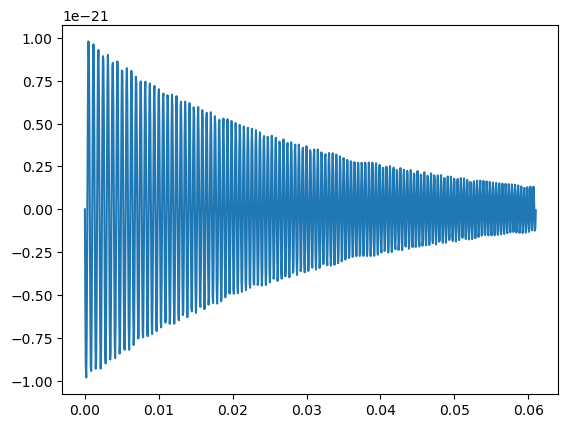

In [8]:
plt.figure()
plt.plot(damped_sin['time'], damped_sin['plus'])

In [9]:
# do you want more than one damped sinusoid?
damped_sin_3 = pmtoolkit.multi_sin(sampling_frequency, duration, 3, window = False, rolloff = 0.2, 
                         amplitude_0 = -21, amplitude_1 = -21, amplitude_2 = -21,
                        weight_0 = 0.35, weight_1 = 0.56,
                        damping_time_0 = 3, damping_time_1 = 1.25, damping_time_2 = 1.5,
                        frequency_0 = 3305, frequency_1 = 2540, frequency_2 = 1870, 
                        phase_0 = 1.74, phase_1 = 0.68, phase_2 = -0.2,
                        drift_0 = 50, drift_1 = 5, drift_2 = 15)

(0.0, 0.03)

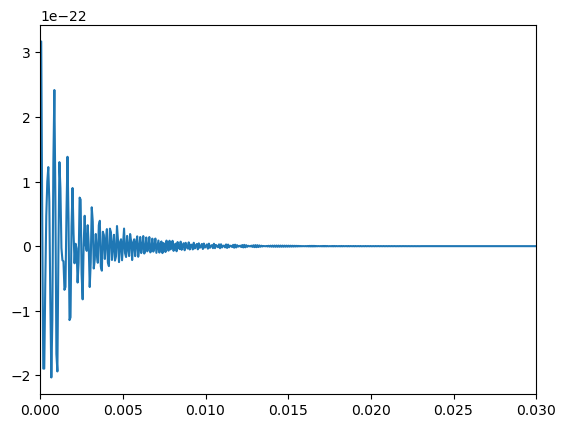

In [10]:
plt.figure()
plt.plot(damped_sin_3['time'], damped_sin_3['plus'])
plt.xlim(0, 0.03)

In [11]:
# we can interpolate the waveform and shift it to a new start time t_0:
wave = pmtoolkit.interpolate_any_wf_to_new_tarray(damped_sin_3, t, 0.01)

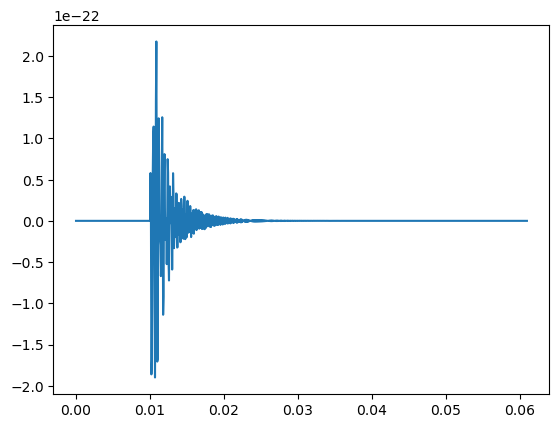

In [12]:
plt.figure()
plt.plot(t, wave['plus'])